# Detector and Particle Measurement Resolution

<CENTER><img src="../../images/ATLASOD.gif" style="width:50%"></CENTER>

This notebook uses ATLAS Open Data https://opendata.atlas.cern to teach you the concepts of detector and particle measurement resolution!

ATLAS Open Data provides open access to proton-proton collision data at the LHC for educational purposes. ATLAS Open Data resources are ideal for high-school, undergraduate and postgraduate students.

## Resolution

The **resolution** of a detector is its ability to distinguish between similar signals. Depending on the type of detector and the measurement that's being made, we may classify different types of resolution, such as *momentum* or *energy* (the ability to distinguish two particles with slightly different momenta or energies), *spatial* (the ability to distinguish two particles that are very close to one-another), and *temporal* resolution (the ability to distinguish two signals that are very close to each other in time).

## Momentum Resolution

Charged particles in ATLAS are measured using the inner tracking detector. This detector is composed of concentric layers, each of which measures the position of a particle. By "connecting the dots" between each of those measurements, it is possible to reconstruct the path that a charged particle took through the detector. Because the inner detector is in a magnetic field, the momentum of the charged particle can then be estimated from how much the particle's path through the detector deviated from a straight path. For a particle traveling in a uniform solenoidal magnetic field $B$ (which is very close to the situation in ATLAS, with a 2 Tesla solenoidal magnetic field) with radius of curvature of the particle's path, also called a "track", of $r$, the relative transverse momentum resolution is given approximately by

$$ \frac{dp_T}{p_T} = \frac{\sqrt{3}}{2} \sigma_x \frac{8p_T}{0.3BL^2}. $$

We can see from this relation that the resolution degrades linearly with $p_T$, but improves with a higher magnetic field and larger radius. In other words, having as large of a magnetic field and radius as possible will help improve in resolving particles, especially those with very high momentum.

NOTE: Will add a momentum resolution plot here.

## Energy Resolution

### Calorimeter Energy Resolution

A calorimeter is a detector that stops electrons, positrons, photons, and jets and measures the energy that was released as they stopped. They are also used in particle identification, as only certain particles will interact with certain calorimeters. [Practical Collider Physics, 6-7] These calorimeters include:

* **Electromagnetic Calorimeters:** Used to stop and measure the energies of electrons, positrons, and photons. As an electron enters the calorimeter, it radiates a bremsstrahlung photon which then produces an electron-positron pair. This process continues, and what results is an electromagnetic shower, such as the one shown in **Figure 1**.
<p>
* **Hadronic Calorimeters:** Used to stop and measure the energies of *jets* produced by quarks and gluons. These jets are primarily sprays of hadrons like protons, pions, and neutrons. They don't interact as much in the electromagnetic calorimeter, but the much thicker hadronic calorimeter is sufficient to stop them.

For more information, refer to [this page](https://cds.cern.ch/record/2759659/files/Calorimeters.pdf).

<CENTER><img src=\"images/resolution_notebook/em_shower.png\" style=\"width:40%\"></CENTER>

**Figure 1.** The development of an electromagnetic shower in an electromagnetic calorimeter. 

The energy resolution of a calorimeter, which sets the precision with which one can reconstruct particle four-vectors, is generally given by

$$ \frac{\sigma(E)}{E} = \frac{a}{\sqrt{E}} \oplus \frac{b}{E} \oplus c, $$

where $\oplus$ denotes addition in quadrature, and we have the following terms:

* The first term, with coefficient $a$, is the **stochastic** or **sampling term**. This takes into account fluctuations in the number of signal generating processes, such as the conversion of light into photo-electrons by a photo-device.
<p>
* The second term, with coefficient $b$, is the **noise term**. This takes into account the noise from readout electronics and pileup (multiple simultaneous proton collisions).
<p>
* The last term, with coefficient $c$, is the **constant term**. This takes into account imperfections in the calorimeter construction, non-uniformities of signal generation and/or collection, channel-to-channel intercalibration errors, and fluctuations in the amount of energy leakage.

For very high particle energies, the constant term is the most dominant. Therefore, in the limit of large $E$, good energy resolution can be achieved by having as small a constant term as possible.

### Jet Energy Resolution

The resolutions described to this point are mostly affected by the detector itself; if one builds a better detector, the resolution can be improved. There are also resolution effects, particularly for measuring jets, that are related to the physics of the jet - the way the particles are produced and interact. The jet energy resolution includes additional effects from sources like:

* The alogorithms used to define the jets
<p>
* The fluctuation in the particle content of jets (e.g. how many protons or pions are inside the jet)
<p>
* The fluctuation in the event itself (e.g. how many particles that don't "belong" to the jet might happen to point in its direction)
<p>
* The fluctuation in energy pileup
<p>
* The magnetic field (e.g. how many particles are "bent into" or "bent out of" the jet by the magnetic field as they go through the inner detector)

The jet energy resolution can be carefully measured by studying the asymmetry of di-jet events in the detector. 

The cone size of the jet has a significant impact on the mass resolution and the energy resolution of the jet. For example, if an analysis wants to only capture quarks and gluons, a small-radius jet might be best. If an analysis wants to capture entire W bosons or top quarks as single jets, a much larger-radius jet might be best. ATLAS provides two different jet collections (one small radius and one large radius) exactly for that reason, and some analyses make use of both in order to get the best of both worlds. In defining the jet axis, the mass resolution $dM/M$ due to the angular error $d\theta$ is given by

$$ \frac{dM}{M} = \frac{p_T}{M}d\theta, $$

where $M$ is the mass and $p_T$ is the transverse momentum of the jet.

NOTE: Will add a jet resolution plot here.

## ATLAS Open Data Initialisation

Now that we have learned these concepts, we are ready to apply them to ATLAS Open Data. The first step in doing this is to set everything up.

### Running a Python notebook

A Python notebook consists of cell blocks, each containing lines of Python code. Each cell can be run independently of each other, yielding respective outputs below the cells. Conventionally, cells are run in order from top to bottom.

* To run the whole notebook, in the top menu click Cell $\rightarrow$ Run All.

* To propagate a change you've made to a piece of code, click Cell $\rightarrow$ Run All Below.

* You can also run a single code cell, by clicking Cell $\rightarrow$ Run Cells, or using the keyboard shortcut Shift+Enter.

For more information, refer to [this page](https://www.codecademy.com/article/how-to-use-jupyter-notebooks).

### First time package installation on your computer (not needed on mybinder)

This first cell installs the required python packages. It only needs to be run the first time you open this notebook on your computer. If you close Jupyter and re-open on the same computer, you won't need to run this first cell again. If this is opened on mybinder, you don't need to run this cell.

In [1]:
import sys
import os.path
!pip install atlasopenmagic
from atlasopenmagic import install_from_environment
install_from_environment()

Installing packages: ['aiohttp>=3.9.5', 'atlasopenmagic>=1.0.1', 'awkward>=2.6.7', 'awkward-pandas>=2023.8.0', 'coffea~=0.7.0', 'hist>=2.8.0', 'ipykernel>=6.29.5', 'jupyter>=1.0.0', 'lmfit>=1.3.2', 'matplotlib>=3.9.1', 'metakernel>=0.30.2', 'notebook<7', 'numpy>=1.26.4', 'pandas>=2.2.2', 'papermill>=2.6.0', 'pip>=24.2', 'scikit-learn>=1.5.1', 'uproot>=5.3.10', 'uproot3>=3.14.4', 'fsspec-xrootd>=0.5.1', 'jupyterlab_latex~=3.1.0', 'vector>=1.4.1']


INFO: pip is looking at multiple versions of coffea to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of coffea to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.


INFO: pip is looking at multiple versions of ipykernel to determine which version is compatible with other requirements. This could take a while.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 82.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 886.8/886.8 kB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 638.8/638.8 kB 111.4 MB/s eta 0:00:00


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 32.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 36.6 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 27.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11/11 [uproot]10/11 [uproot]]ib]n]


We're going to import a number of packages to help us:

* `numpy`: provides numerical calculations such as histogramming

* `matplotlib`: common tool for making plots, figures, images, visualisations

* `uproot`: processes .root files typically used in particle physics into data formats used in python

* `awkward`: introduces awkward arrays, a format that generalizes numpy to nested data with possibly variable length lists

* `vector`: to allow vectorized 4-momentum calculations

In case these imports fail, try restarting the jupyter kernel and running again; it may simply be that the modules we installed in the previous cell have not yet been fully loaded.

In [2]:
import numpy as np # for numerical calculations such as histogramming
import matplotlib.pyplot as plt # for plotting
import matplotlib_inline # to edit the inline plot format
from matplotlib.ticker import AutoMinorLocator # for minor ticks
import uproot # for reading .root files
import awkward as ak # to represent nested data in columnar format
import vector # for 4-momentum calculations
import time # for printing time stamps
import requests # for file gathering, if needed; for HTTP access
from scipy.spatial import cKDTree # for making combinations in particle matching
from scipy.stats import norm # for gaussian distribution fit

In [3]:
# Get the files locally, rather than streaming the data (easier on the upstream servers)
local_files = True

Unit definitions, as stored in the data files:

In [4]:
MeV = 0.001
GeV = 1.0

To reinforce the ideas of detector and particle resolution, we will apply these concepts by looking at data from ATLAS experiments. We will use the [atlasopenmagic](https://opendata.atlas.cern/docs/data/atlasopenmagic) package to access the open data directly from the ATLAS OpenData Portal. The first step is import the module and load the release.

In [5]:
# ATLAS Open Data directory
import atlasopenmagic as atom
atom.available_releases()
atom.set_release('2025e-13tev-beta')

{'2016e-8tev': '2016 Open Data for education release for 8 TeV proton-proton '
               'collisions (https://opendata.cern/record/3860).',
 '2024r-pp': '2024 Open Data for research release for proton-proton collisions '
             '(https://opendata.cern/record/80020).',
 '2025e-13tev-beta': '2025 Open Data for education and outreach beta release '
                     'for 13 TeV proton-proton collisions '
                     '(https://opendata.cern.ch/record/93910).'}


For convenient naming and identification purposes, we define a dictionary which stores all the important names of the samples we want to pull from the database for this case study. The datset ID's can be found here on [this page](https://opendata.atlas.cern/docs/data/for_education/13TeV25_metadata).

In [6]:
mc_defs = {
    r'mu_mu': {'dids': [700323,700324,700325]},
    r'e_e': {'dids': [700320,700321,700322]},
    r'jets': {'dids': [364703,364706]},
}

# Case Study 1: Muon and Electron Resolution

For our first case study, we would like to explore the resolution of muon and electron reconstruction. We start by first choosing a `skim` for our analysis, which places cuts into our data. In this case, we will use the `2to4lep` skim and apply this into our dataset.

In [8]:
# Select the skim to use for the analysis
skim1 = "2to4lep"

mc_samples   = atom.build_mc_dataset(mc_defs, skim1, protocol='https')
data_samples = atom.build_data_dataset(skim1, protocol='https')

samples = {**data_samples, **mc_samples}
samples.keys()

dict_keys(['Data', 'mu_mu', 'e_e', 'jets'])

Let's try accessing the first file in the `mu_mu` dataset as an example.

In [9]:
# We will use the first entry in 'list', from the 'mu_mu' dataset
value = samples['mu_mu']['list'][0]
print(f"{value = }")

# We can keep this file URL to peek into it and understanding what our data looks like
mu_mu_file = value

value = 'https://opendata.cern.ch//eos/opendata/atlas/rucio/opendata/ODEO_FEB2025_v0_2to4lep_mc_700323.Sh_2211_Zmumu_maxHTpTV2_BFilter.2to4lep.root'


The output `value` gives the URL link to the first sample in the `mu_mu` dataset (700323). This sample is stored in `mu_mu_file` and will be the one of the samples that we will use throughout this case study. We now want to open this file to see what's inside. The file contains a `tree`, which contains multiple entries, each representing an event. For each event, a dictionary stores all relevant information with keys, such as the event number (`eventNumber`), the photon transverse momentum (`photon_pt`), and more. (More information on trees can be viewed [here](https://notebooks.githubusercontent.com/view/%22https://masonproffitt.github.io/uproot-tutorial/03-trees/index.html%22).)

In [10]:
# Accessing the file from the online database (":analysis" opens the tree in a desired manner)
if local_files:
    
    # Download the file, use a local copy
    local_filename = mu_mu_file.split("/")[-1]
    print(f"Downloading {mu_mu_file} to {local_filename} ...")
    
    with requests.get(mu_mu_file, stream=True) as r:
        r.raise_for_status()
        with open(local_filename, "wb") as f:
            for chunk in r.iter_content(chunk_size=8192):
                f.write(chunk)
                
    tree = uproot.open(local_filename + ":analysis")
else: # Stream files
    tree = uproot.open(mu_mu_file + ":analysis")
    
# The number of entries in the tree can be viewed
print("\n The number of entries in the tree are:", tree.num_entries)

# The number of variables in the tree can be viewed
print("\n The number of variables in the tree is:", len(tree.keys()))


 The number of entries in the tree are: 2437801

 The number of variables in the tree is: 116


*Whoa*---that's a lot of entries and variables! Thankfully, we will only need very few variables in this analysis. A list of all the variables can be found [here](https://opendata.atlas.cern/docs/data/for_education/13TeV25_details#variable-list). As we go along through this notebook, we will take the ones that we need from this list.

Now that we understand how to access the information in this `tree`, we can begin the analysis. 

## A. Muon Resolution

Let us first consider muon resolution. For this part of the analysis, we will first need the following variables:

* `truth_muon_pt`: transverse momentum of the truth muons

* `truth_muon_eta`: pseudo-rapidity of the truth muons

* `truth_muon_phi`: azimuthal angle of the truth muons

The following block of code allows us to take these variables from the `tree`.

In [11]:
# Define what variables are important to our analysis
muon_variables = ['truth_muon_pt', 'truth_muon_eta', 'truth_muon_phi']

# To see all the data for our given variables
tree.iterate(muon_variables, library="ak");

Now that we have taken the variables we need from the `tree`, we now have to create an array for each variable to store the values of each variable.

In [12]:
for array in tree.iterate(muon_variables, library="ak"):
    # Creating arrays for truth_muon_pt, truth_muon_eta, and truth_muon_phi variables
    truth_muon_pt = array["truth_muon_pt"]
    truth_muon_eta = array["truth_muon_eta"]
    truth_muon_phi = array["truth_muon_phi"]

These three arrays contain the values of their respective variables in an event-by-event basis, as we can see by printing out the first 5 entries of the `muon_pt` array:

In [13]:
print("muon_pt:", truth_muon_pt[:5])

muon_pt: [[58.5, 97.8], [84, 29.6], [43.3, 56.7], [184, 44.2], [32.7, 61.2]]


This is an array that contains sub-arrays, where each sub-array represents an event and contains the values of the transverse momentum for each muon in that event. Since we want to look at every muon across all events, it is more convenient to create new arrays that contains all of these values as one big list (that is, without the sub-arrays). This can be done by applying `ak.flatten` to each array.

In [14]:
# Flatten to treat all muons across all events as one big list
muon_pt_flat = ak.flatten(truth_muon_pt)
muon_eta_flat = ak.flatten(truth_muon_eta)
muon_phi_flat = ak.flatten(truth_muon_phi)

Let us now look at the first 10 entries of the `muon_pt_flat` array:

In [15]:
print("muon_pt_flat:", muon_pt_flat[:10])

muon_pt_flat: [58.5, 97.8, 84, 29.6, 43.3, 56.7, 184, 44.2, 32.7, 61.2]


We now see that these are the first 10 values listed as in the `muon_pt` array, but without the sub-arrays.

### 📊 Muon Resolution between 30 and 50 GeV

Let us first consider the resolution of muons with transverse momentum $p_T$ between 30 and 50 GeV. We can select these muons by applying a `mask` to the arrays we have just made.

In [16]:
muon_pt_mask = (muon_pt_flat > 30) & (muon_pt_flat < 50)

muon_masked_pt = muon_pt_flat[muon_pt_mask]
muon_masked_eta = muon_eta_flat[muon_pt_mask]
muon_masked_phi = muon_phi_flat[muon_pt_mask]

We now want to find a truth muon that *matches* a reconstructed muon. To this end, we will need the following reconstructed lepton variables:

* `lep_pt`: transverse momentum of the lepton

* `lep_eta`: pseudo-rapidity of the lepton

* `lep_phi`: azimuthal angle of the lepton

* `lep_type`: number signifying the lepton type (11 for electrons and 13 for muons)

Just as we did for the truth muon variables, we will take these variables from the `tree`, create an `ak` array for each variable, and then flatten them using `ak.flatten`.

In [17]:
# Define what variables are important to our analysis
lep_variables = ['lep_pt', 'lep_eta', 'lep_phi', 'lep_type']

# To see all the data for our given variables
tree.iterate(lep_variables, library="ak");

In [18]:
for array in tree.iterate(lep_variables, library="ak"):
    # Creating arrays for truth_muon_pt, truth_muon_eta, and truth_muon_phi variables
    lep_pt = array["lep_pt"]
    lep_eta = array["lep_eta"]
    lep_phi = array["lep_phi"]
    lep_type = array["lep_type"]

In [19]:
# Flatten to treat all muons across all events as one big list
lep_pt_flat = ak.flatten(lep_pt)
lep_eta_flat = ak.flatten(lep_eta)
lep_phi_flat = ak.flatten(lep_phi)
lep_type_flat = ak.flatten(lep_type)

These arrays that we have made contain values for leptons, that is, muons *and* electrons. Since we only want to consider muons for this part of the analysis, we can use the `lep_type_flat` array we have made to create a `mask` that selects the values for only muons for each array.

In [20]:
# Create a mask to select only muons (13)
muon_mask = (lep_type_flat) == 13

# Apply the mask to each array
lep_muon_pt = lep_pt_flat[muon_mask]
lep_muon_eta = lep_eta_flat[muon_mask]
lep_muon_phi = lep_phi_flat[muon_mask]

The following function, called `matched`, tries to find a truth muon that matches to a reconstructed muon. The $p_T$ of each truth muon that has been matched will also be stored in a new array called `matched_truth_pt`, and the $p_T$ of each reconstructed muon associated with the matched truth muon is stored in a new array called `matched_reco_pt`. This function is taken from this [notebook](https://opendata.atlas.cern/docs/13TeV25Doc/13tutorial#detector-acceptance-and-efficiency-new) on detector acceptance and efficiency; more information on reconstruction and matching can be found there.

In [21]:
def matched(truth_pt, truth_eta, truth_phi, lep_pt, lep_eta, lep_phi, dr_threshold=0.1):
    
    # Step 1: Wrap phi values into [-π, π] for consistent Δφ calculation
    def wrap_phi(phi_array):
        wrapped = []
        for phi in phi_array:
            while phi > np.pi:     # If phi > pi, keep subtracting 2pi until it is within -pi to +pi
                phi -= 2 * np.pi
            while phi < -np.pi:    # If phi < -pi, keep adding 2pi until it is within -pi to +pi
                phi += 2 * np.pi
            wrapped.append(phi)
        return np.array(wrapped)

    truth_phi = wrap_phi(truth_phi)
    lep_phi   = wrap_phi(lep_phi)
    
    # Step 2: Build KDTree from truth lepton η–φ coordinates
    truth_tree = cKDTree(np.column_stack((truth_eta, truth_phi)))
    
    # Step 3: Query nearest truth lepton for each reconstructed lepton
    distances, indices = truth_tree.query(
        np.column_stack((lep_eta, lep_phi)),
        distance_upper_bound=dr_threshold)

    matched_truth_indices = []
    matched_lepton_indices = []
    matched_truths = set()
    
    # Step 4: Track one-to-one matches (no duplicate truth matches)
    for lep_idx, (dR, truth_idx) in enumerate(zip(distances, indices)):
        if dR != np.inf and truth_idx not in matched_truths:
            matched_lepton_indices.append(lep_idx)
            matched_truth_indices.append(truth_idx)
            matched_truths.add(truth_idx)
            
    # Step 5: Extract matched muons pT
    matched_truth_pt = truth_pt[matched_truth_indices]
    matched_reco_pt  = lep_pt[matched_lepton_indices]

    return matched_truth_pt, matched_reco_pt

We now call our function in the following way to create $p_T$ arrays for the matched truth muons and their corresponding reconstructed muon:

In [22]:
matched_truth_pt, matched_reco_pt = matched(muon_masked_pt, muon_masked_eta, muon_masked_phi, lep_muon_pt, lep_muon_eta, lep_muon_phi)

We now make the following histogram.

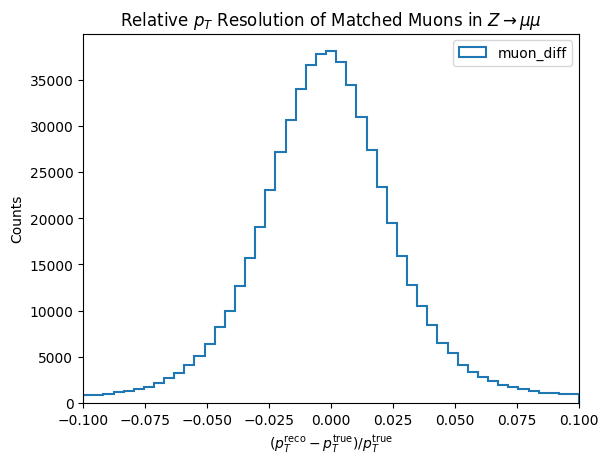

In [23]:
# Data to plot on histogram
muon_diff = (matched_reco_pt - matched_truth_pt) / matched_truth_pt

# Set bin size
bins = np.linspace(-0.1, 0.1, 50)  # 10 bins from 0 to 50 GeV (bin size = 5 GeV)

# Plot histograms
plt.hist(muon_diff, bins=bins, histtype='step', linewidth=1.5, label='muon_diff')

# Set x-axis range
plt.xlim(-0.1, 0.1)

# Add labels and legend
plt.xlabel(r'$(p_T^{\mathrm{reco}} - p_T^{\mathrm{true}}) / p_T^{\mathrm{true}}$')
plt.ylabel('Counts')
plt.title(r'Relative $p_T$ Resolution of Matched Muons in $Z \to \mu \mu$')
plt.legend()

plt.show()

We now want to fit a Gaussian to this distribution.

In [24]:
# Apply a fit range mask: e.g., only keep values between -0.1 and 0.1
fit_range_mask = (muon_diff > -0.1) & (muon_diff < 0.1)
muon_diff_core = muon_diff[fit_range_mask]

# Now fit a Gaussian to just the core region
mu, sigma = norm.fit(muon_diff_core)

# Print the result
print(f"Fit within [-0.1, 0.1]:  Mean = {mu:.4f},  Sigma = {sigma:.4f}")

Fit within [-0.1, 0.1]:  Mean = -0.0015,  Sigma = 0.0291


### 📊 Muon Resolution for Various $p_T$ Ranges

We considered only a 30-50 GeV selection on the truth muons. Let us now consider making other selections, such as the following:

* 50-100 GeV

* 200-300 GeV

* 500-700 GeV

* 700-1000 GeV

In [25]:
muon_pt_mask1 = (muon_pt_flat > 50) & (muon_pt_flat < 100)

muon_masked1_pt = muon_pt_flat[muon_pt_mask1]
muon_masked1_eta = muon_eta_flat[muon_pt_mask1]
muon_masked1_phi = muon_phi_flat[muon_pt_mask1]


muon_pt_mask2 = (muon_pt_flat > 100) & (muon_pt_flat < 200)

muon_masked2_pt = muon_pt_flat[muon_pt_mask2]
muon_masked2_eta = muon_eta_flat[muon_pt_mask2]
muon_masked2_phi = muon_phi_flat[muon_pt_mask2]


muon_pt_mask3 = (muon_pt_flat > 300) & (muon_pt_flat < 500)

muon_masked3_pt = muon_pt_flat[muon_pt_mask3]
muon_masked3_eta = muon_eta_flat[muon_pt_mask3]
muon_masked3_phi = muon_phi_flat[muon_pt_mask3]


muon_pt_mask4 = (muon_pt_flat > 500) & (muon_pt_flat < 700)

muon_masked4_pt = muon_pt_flat[muon_pt_mask4]
muon_masked4_eta = muon_eta_flat[muon_pt_mask4]
muon_masked4_phi = muon_phi_flat[muon_pt_mask4]

In [26]:
matched_pt1, lep_matched_pt1 = matched(muon_masked1_pt, muon_masked1_eta, muon_masked1_phi, lep_muon_pt, lep_muon_eta, lep_muon_phi)

In [27]:
matched_pt2, lep_matched_pt2 = matched(muon_masked2_pt, muon_masked2_eta, muon_masked2_phi, lep_muon_pt, lep_muon_eta, lep_muon_phi)

In [28]:
matched_pt3, lep_matched_pt3 = matched(muon_masked3_pt, muon_masked3_eta, muon_masked3_phi, lep_muon_pt, lep_muon_eta, lep_muon_phi)

In [29]:
matched_pt4, lep_matched_pt4 = matched(muon_masked4_pt, muon_masked4_eta, muon_masked4_phi, lep_muon_pt, lep_muon_eta, lep_muon_phi)

To see these distributions more clearly, we can normalize them all so that the area under their curves are equal to one. This is done by simply including `density=True` for each `plt.hist`.

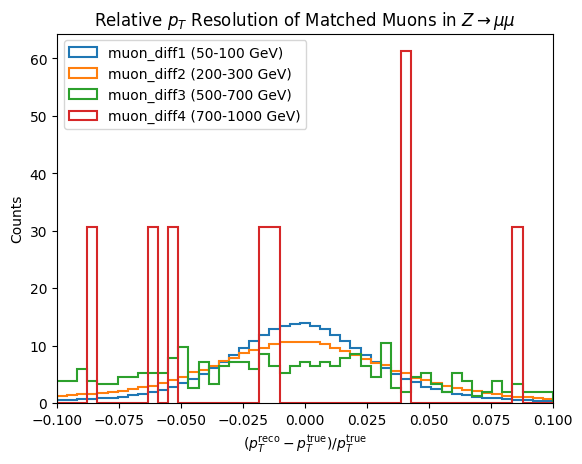

In [30]:
# Data to plot on histogram
muon_diff1 = (lep_matched_pt1 - matched_pt1) / matched_pt1
muon_diff2 = (lep_matched_pt2 - matched_pt2) / matched_pt2
muon_diff3 = (lep_matched_pt3 - matched_pt3) / matched_pt3
muon_diff4 = (lep_matched_pt4 - matched_pt4) / matched_pt4

# Set bin size
bins = np.linspace(-0.1, 0.1, 50)  # 10 bins from 0 to 50 GeV (bin size = 5 GeV)

# Plot histograms with density=True to normalize by area (integral)
plt.hist(muon_diff1, bins=bins, histtype='step', linewidth=1.5, density=True, label='muon_diff1 (50-100 GeV)')
plt.hist(muon_diff2, bins=bins, histtype='step', linewidth=1.5, density=True, label='muon_diff2 (200-300 GeV)')
plt.hist(muon_diff3, bins=bins, histtype='step', linewidth=1.5, density=True, label='muon_diff3 (500-700 GeV)')
plt.hist(muon_diff4, bins=bins, histtype='step', linewidth=1.5, density=True, label='muon_diff4 (700-1000 GeV)')

# Set x-axis range
plt.xlim(-0.1, 0.1)

# Add labels and legend
plt.xlabel(r'$(p_T^{\mathrm{reco}} - p_T^{\mathrm{true}}) / p_T^{\mathrm{true}}$')
plt.ylabel('Counts')
plt.title(r'Relative $p_T$ Resolution of Matched Muons in $Z \to \mu \mu$')
plt.legend()

plt.show()

## B. Electron Resolution

We would like to do the same thing as we did for muons, but now for electrons. To do this, we first select the first sample from our electron dataset.

In [31]:
# We will use the first entry in 'list', from the 'e_e' dataset
value = samples['e_e']['list'][0]
print(f"{value = }")

# We can keep this file URL to peek into it and understanding what our data looks like
e_e_file = value

value = 'https://opendata.cern.ch//eos/opendata/atlas/rucio/opendata/ODEO_FEB2025_v0_2to4lep_mc_700320.Sh_2211_Zee_maxHTpTV2_BFilter.2to4lep.root'


In [32]:
# Accessing the file from the online database (":analysis" opens the tree in a desired manner)
if local_files:
    
    # Download the file, use a local copy
    local_filename = e_e_file.split("/")[-1]
    print(f"Downloading {e_e_file} to {local_filename} ...")
    
    with requests.get(e_e_file, stream=True) as r:
        r.raise_for_status()
        with open(local_filename, "wb") as f:
            for chunk in r.iter_content(chunk_size=8192):
                f.write(chunk)
                
    tree = uproot.open(local_filename + ":analysis")
else: # Stream files
    tree = uproot.open(e_e_file + ":analysis")
    
# The number of entries in the tree can be viewed
print("\n The number of entries in the tree are:", tree.num_entries)

# The number of variables in the tree can be viewed
print("\n The number of variables in the tree is:", len(tree.keys()))


 The number of entries in the tree are: 2469788

 The number of variables in the tree is: 116


We now need to take the following variables from our `tree` and create arrays for them:

* `truth_elec_pt`: transverse momentum of the truth electrons

* `truth_elec_eta`: pseudo-rapidity of the truth electrons

* `truth_elec_phi`: azimuthal angle of the truth electrons

In [33]:
# Define what variables are important to our analysis
elec_variables = ['truth_elec_pt', 'truth_elec_eta', 'truth_elec_phi']

# To see all the data for our given variables
tree.iterate(elec_variables, library="ak");

In [34]:
for array in tree.iterate(elec_variables, library="ak"):
    # Creating arrays for truth_elec_pt, truth_elec_eta, and truth_elec_phi variables
    truth_elec_pt = array["truth_elec_pt"]
    truth_elec_eta = array["truth_elec_eta"]
    truth_elec_phi = array["truth_elec_phi"]

In [35]:
# Flatten to treat all muons across all events as one big list
elec_pt_flat = ak.flatten(truth_elec_pt)
elec_eta_flat = ak.flatten(truth_elec_eta)
elec_phi_flat = ak.flatten(truth_elec_phi)

Given our electron arrays, we now `mask` them to select only those with $p_T$ between 30 and 50 GeV.

In [36]:
elec_pt_mask = (elec_pt_flat > 30) & (elec_pt_flat < 50)

elec_masked_pt = elec_pt_flat[elec_pt_mask]
elec_masked_eta = elec_eta_flat[elec_pt_mask]
elec_masked_phi = elec_phi_flat[elec_pt_mask]

We now want to find a truth electron that matches a reconstructed electron. This process is very similar to what we did for muons.

In [37]:
# Define what variables are important to our analysis
lep_variables = ['lep_pt', 'lep_eta', 'lep_phi', 'lep_type']

# To see all the data for our given variables
tree.iterate(lep_variables, library="ak");

In [38]:
for array in tree.iterate(lep_variables, library="ak"):
    # Creating arrays for lep_pt, lep_eta, and lep_phi variables
    lep_pt = array["lep_pt"]
    lep_eta = array["lep_eta"]
    lep_phi = array["lep_phi"]
    lep_type = array["lep_type"]

In [39]:
# Flatten to treat all muons across all events as one big list
lep_pt_flat = ak.flatten(lep_pt)
lep_eta_flat = ak.flatten(lep_eta)
lep_phi_flat = ak.flatten(lep_phi)
lep_type_flat = ak.flatten(lep_type)

To consider only electrons in this analysis, we use `lep_type_flat` to place a mask that selects only electrons for each array.

In [40]:
# Create a mask to select only electrons (11)
mask = (lep_type_flat) == 11

# Apply the mask to each array
lep_elec_pt = lep_pt_flat[mask]
lep_elec_eta = lep_eta_flat[mask]
lep_elec_phi = lep_phi_flat[mask]

We now call our function in the following way to create $p_T$ arrays for the matched truth electrons and their corresponding reconstructed electron:

In [41]:
matched_truth_pt, matched_reco_pt = matched(elec_masked_pt, elec_masked_eta, elec_masked_phi, lep_elec_pt, lep_elec_eta, lep_elec_phi)

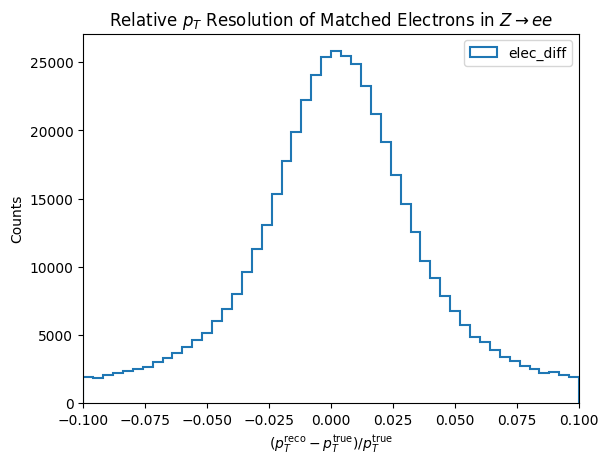

In [42]:
# Data to plot on histogram
elec_diff = (matched_reco_pt - matched_truth_pt) / matched_truth_pt

# Set bin size
bins = np.linspace(-0.1, 0.1, 51)  # 50 bins from -0.1 to +0.1

# Plot histograms
plt.hist(elec_diff, bins=bins, histtype='step', linewidth=1.5, label='elec_diff')

# Set x-axis range
plt.xlim(-0.1, 0.1)

# Add labels and legend
plt.xlabel(r'$(p_T^{\mathrm{reco}} - p_T^{\mathrm{true}}) / p_T^{\mathrm{true}}$')
plt.ylabel('Counts')
plt.title(r'Relative $p_T$ Resolution of Matched Electrons in $Z \to e e$')
plt.legend()

plt.show()

In [43]:
# Apply a fit range mask: e.g., only keep values between -0.1 and 0.1
fit_range_mask = (elec_diff > -0.1) & (elec_diff < 0.1)
elec_diff_core = elec_diff[fit_range_mask]

# Now fit a Gaussian to just the core region
mu, sigma = norm.fit(elec_diff_core)

# Print the result
print(f"Fit within [-0.1, 0.1]:  Mean = {mu:.4f},  Sigma = {sigma:.4f}")

Fit within [-0.1, 0.1]:  Mean = 0.0025,  Sigma = 0.0359


# Case Study 2: MC and Data Muon Resolution

We now want to pick out pairs of reconstructed muons from the $Z \to \mu \mu$ dataset.

# Case Study 3: Jet Resolution

We want to do something similar with electron and muon resolution, but now with jets.

In [44]:
# Select the skim to use for the analysis
skim3 = "noskim"

mc_samples   = atom.build_mc_dataset(mc_defs, skim3, protocol='https')
data_samples = atom.build_data_dataset(skim3, protocol='https')

samples = {**data_samples, **mc_samples}
samples.keys()

dict_keys(['Data', 'mu_mu', 'e_e', 'jets'])

In [45]:
# We will use the first entry in 'list', from the 'jets' dataset
value = samples['jets']['list'][0]
print(f"{value = }")

# We can keep this file URL to peek into it and understanding what our data looks like
jets_file = value

value = 'https://opendata.cern.ch//eos/opendata/atlas/rucio/user/egramsta/mc_364703.Pythia8EvtGen_A14NNPDF23LO_jetjet_JZ3WithSW.noskim.root'


In [46]:
# Accessing the file from the online database (":analysis" opens the tree in a desired manner)
if local_files:
    
    # Download the file, use a local copy
    local_filename = jets_file.split("/")[-1]
    print(f"Downloading {jets_file} to {local_filename} ...")
    
    with requests.get(jets_file, stream=True, timeout=30) as r:
        r.raise_for_status()
        with open(local_filename, "wb") as f:
            for chunk in r.iter_content(chunk_size=8192):
                f.write(chunk)
                
    tree = uproot.open(local_filename + ":analysis")
else: # Stream files
    tree = uproot.open(jets_file + ":analysis")
    
# The number of entries in the tree can be viewed
print("\n The number of entries in the tree are:", tree.num_entries)

# The number of variables in the tree can be viewed
print("\n The number of variables in the tree is:", len(tree.keys()))


 The number of entries in the tree are: 49959747

 The number of variables in the tree is: 116


In [47]:
# Define what variables are important to our analysis
truth_jet_variables = ['truth_jet_pt', 'truth_jet_eta', 'truth_jet_phi']

# To see all the data for our given variables
tree.iterate(truth_jet_variables, library="ak");

In [48]:
for array in tree.iterate(truth_jet_variables, library="ak"):
    # Creating arrays for truth_jet_pt, truth_jet_eta, and truth_jet_phi variables
    truth_jet_pt = array["truth_jet_pt"]
    truth_jet_eta = array["truth_jet_eta"]
    truth_jet_phi = array["truth_jet_phi"]

In [49]:
# Flatten to treat all muons across all events as one big list
jet_pt_flat = ak.flatten(truth_jet_pt)
jet_eta_flat = ak.flatten(truth_jet_eta)
jet_phi_flat = ak.flatten(truth_jet_phi)

Given our jet arrays, we now mask them to select only those between 30 and 50 GeV.

In [50]:
jet_pt_mask = (jet_pt_flat > 30) & (jet_pt_flat < 50)

jet_masked_pt = elec_pt_flat[jet_pt_mask]
jet_masked_eta = elec_eta_flat[jet_pt_mask]
jet_masked_phi = elec_phi_flat[jet_pt_mask]

We now want to find a reconstructed jet that matches a jet. To this end, we must first select the sample variables from an actual experiment and make their arrays:

In [51]:
# Define what variables are important to our analysis
reco_jet_variables = ['jet_pt', 'jet_eta', 'jet_phi']

# To see all the data for our given variables
tree.iterate(reco_jet_variables, library="ak");

In [52]:
for array in tree.iterate(reco_jet_variables, library="ak"):
    # Creating arrays for jet_pt, jet_eta, and jet_phi variables
    jet_pt = array["jet_pt"]
    jet_eta = array["jet_eta"]
    jet_phi = array["jet_phi"]

In [53]:
# Flatten to treat all jets across all events as one big list
jet_pt_flat = ak.flatten(jet_pt)
jet_eta_flat = ak.flatten(jet_eta)
jet_phi_flat = ak.flatten(jet_phi)

We now call our function in the following way to create $p_T$ arrays for the matched truth jets and their corresponding reconstructed jet:

In [54]:
matched_truth_pt, matched_reco_pt = matched(jet_masked_pt, jet_masked_eta, jet_masked_phi, jet_pt_flat, jet_eta_flat, jet_phi_flat)

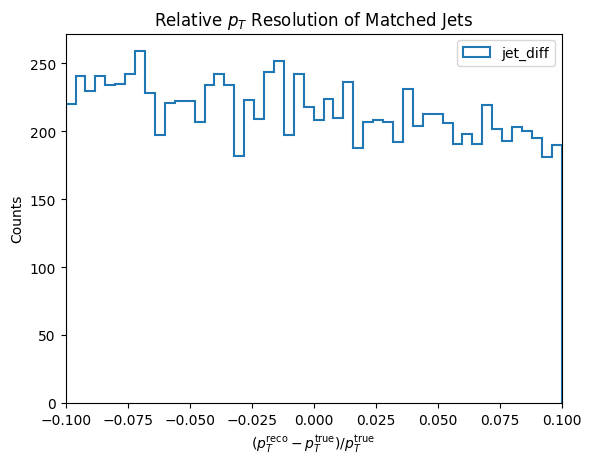

In [55]:
# Data to plot on histogram
jet_diff = (matched_reco_pt - matched_truth_pt) / matched_truth_pt

# Set bin size
bins = np.linspace(-0.1, 0.1, 51)  # 50 bins from -0.1 to +0.1

# Plot histograms
plt.hist(jet_diff, bins=bins, histtype='step', linewidth=1.5, label='jet_diff')

# Set x-axis range
plt.xlim(-0.1, 0.1)

# Add labels and legend
plt.xlabel(r'$(p_T^{\mathrm{reco}} - p_T^{\mathrm{true}}) / p_T^{\mathrm{true}}$')
plt.ylabel('Counts')
plt.title(r'Relative $p_T$ Resolution of Matched Jets')
plt.legend()

plt.show()

In [56]:
# Apply a fit range mask: e.g., only keep values between -0.1 and 0.1
fit_range_mask = (jet_diff > -0.1) & (jet_diff < 0.1)
jet_diff_core = jet_diff[fit_range_mask]

# Now fit a Gaussian to just the core region
mu, sigma = norm.fit(jet_diff_core)

# Print the result
print(f"Fit within [-0.1, 0.1]:  Mean = {mu:.4f},  Sigma = {sigma:.4f}")

Fit within [-0.1, 0.1]:  Mean = -0.0033,  Sigma = 0.0575


## Case Study 4: Photon Resolution & Higgs Boson Width